# IPBMA_7: CT Sinogram

**Authors**: 
- Pablo García Fernández (pablo.garcia.fernandez2@rai.usc.es)
- Javier Goya Pérez (javier.goya@rai.usc.es)
- Sindy Rocío Mojica Gómez (sindyrocio.mojica@rai.usc.es)

In [87]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
%run ./funciones.py
%run ./funciones_phantoms.py

SOURCE

In [88]:
# X-RAY SOURCE

kVp= 100
I0= 75000  
N0, eE= source(kVp, I0)

print(N0, eE)


75000 40.0


In [89]:
# OBJECT

edge_size= 256//4
eE= 40
#obj= cube_phantom(edge_size, eE)
obj = cube_phantom_cc(edge_size, eE)
obj2 = cube_phantom(edge_size, eE)


coef_bone: 1.27776
coef_soft: 0.284928
coef_air: 0.0002994
coef_water: 0.2683
coef_soft: 0.284928


In [90]:
# CT INTERACTOR

nProjections= 180
h= 128//4
qSinograma= interactor_CT(N0, obj, h, nProjections)

######
# cubo malo 
qSinograma_malo= interactor_CT(N0, obj2, h, nProjections)

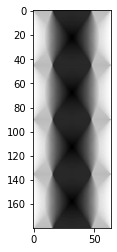

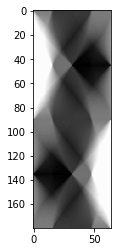

In [91]:
plt.imshow(qSinograma, cmap="gray")
plt.show()

plt.imshow(qSinograma_malo, cmap="gray")
plt.show()

In [92]:
# DETECTOR
%run ./funciones.py
nDetectors=64
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)

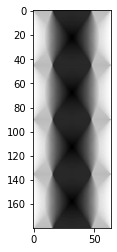

In [93]:
plt.imshow(dSinograma, cmap="gray")
plt.show()

In [94]:
# PROCESSING
pSinograma= process_CT(dSinograma, N0)

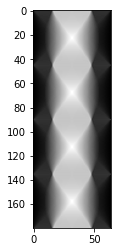

In [95]:
plt.imshow(pSinograma, cmap="gray")
plt.show()

SAVE GENERIC SINOGRAM

In [96]:
# FEATURES
nProjections= 360
h= 128//4
nDetectors= 512

In [97]:
qSinograma= interactor_CT(N0, obj, h, nProjections)

In [ ]:
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)

In [ ]:
pSinograma= process_CT(dSinograma, N0)

In [ ]:
np.save("sinogram.npy", pSinograma)

In [ ]:
plt.imsave("sinogram.png", pSinograma, cmap='gray')

In [ ]:
pSinograma= np.load('sinogram.npy')

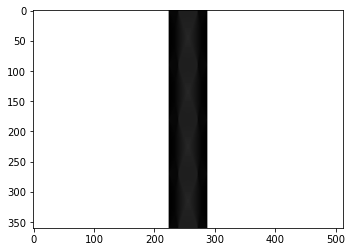

In [ ]:
plt.imshow(pSinograma, cmap="gray")
plt.show()